## a.

$ -\bigtriangledown^2 u-k^2u = 0 $ in $ \Omega$  ...(1)

$ n . \bigtriangledown u = 0 $ on $\Gamma_{wall}$  ...(2)

$ n . \bigtriangledown u + iku = 0 $ in $\Gamma_{out} $ ...(3)

$ n . \bigtriangledown u + iku = 2ik $ in $\Gamma_{in} $ ...(4)

k = 6 and with boundary conditions: 

$\Omega = [0\le x \le 5, 0 \le y \le 1]$ ...(7)

$\Gamma_{in} = [x =0 , 0 \le y \le 1] $ ...(8)

$\Gamma_{out} = [x =5 , 0 \le y \le 1] $ ...(9)

$\Gamma_{wall} = [0 \le x \le 5 , y =0 $ or $ y =1] $ ...(10)

$ \bigtriangledown u = \frac{\partial u}{\partial x}.\hat{x} + \frac{\partial u}{\partial y}.\hat{y} = -ik.e^{-ik.x}\hat{x}$ where 
$\hat{x},\hat{y}$ are unit vectors in x and y directions.

$\bigtriangledown^2 u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = (-ik)^2.e^{-ik.x} = k^2.e^{-ik.x}$

. substituting $u_{exact}$ in (1) using B.C. of (7) yields:

$ -\bigtriangledown^2 u-k^2u $ in $ \Omega = k^2.e^{-ik.x} - k^2.e^{-ik.x} = 0 $

. substituting $u_{exact}$ in (2) using B.C. of (10) yields:

since n is same direction of $\hat{x}$, hence $ n = \hat{x} $

$ n . \bigtriangledown u $ on $\Gamma_{wall} = \hat{x}.(-ike^{-ik.x}\hat{x}) = \hat{x}.-ike^{-ik.x} \hat{x}$ 

$ \hat{x}.(-ike^{-ik.x}\hat{x})= |\hat{x}|.|ke^{-ik.x}|.cos(\theta) = 0 $ since $\theta = 90$

. substituting $u_{exact}$ in (3) using B.C. of (9) yields:

n is same direction of $\hat{x}, n = \hat{x} $

$ n . \bigtriangledown u + iku $ in $\Gamma_{out} = \hat{x}. (-ik.e^{-ik.x}\hat{x}) +ike^{-ikx}$

rearranging:

$ n . \bigtriangledown u + iku $ in $\Gamma_{out} = \hat{x}.\hat{x} (-ik.e^{-ik.x}) +ike^{-ikx}$

since $\hat{x}.\hat{x} = 1$ then $ n.\bigtriangledown u + iku =  -ik.e^{-ik.x} +ike^{-ikx} = 0$

. substituting $u_{exact}$ in (4) using B.C. of (8) yields:

n is in opposite direction of $\hat{x}, n = -\hat{x} $

$ n.\bigtriangledown u + iku $ in $\Gamma_{in} =  -\hat{x}. (-ik.e^{-ik.x}\hat{x}) +ike^{-ikx} $

rearranging, using x = 0 yields: 

$ n.\bigtriangledown u + iku $ in $\Gamma_{in} =  -\hat{x}.\hat{x} (-ik.e^{-ik.0}) +ike^{-ik.0} = -1.(-ik)+ik = 2ik$

utility functions

In [2]:
%matplotlib inline
import numpy as np
import scipy.sparse as sps
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import matplotlib.tri as tri 
from scipy.sparse.linalg import spsolve

def all_edges(t,p):
    # Find all unique edges in the triangulation t (ne-by-2 array)
    # Second output is indices to the boundary edges.
    edges = np.vstack((t[:,[0,1]], t[:,[1,2]], t[:,[2,0]]))
    key = edges.min(axis=1) + edges.max(axis=1) * p.shape[0]
    _, ix, counts = np.unique(key, return_index=True, return_counts=True)
    return edges[ix, :], np.where(counts == 1)

def boundary_nodes(t,p):
    # Find all boundary nodes in the triangulation t
    edges, boundary_indices = all_edges(t,p)
    return np.unique(edges[boundary_indices, :].flatten())

def boundary_edges(t,p):
    # Find all boundary edges in the triangulation t
    edges, boundary_indices = all_edges(t,p)
    return edges[boundary_indices, :]

def tplot(p, t, u=None):
    # Plot triangular mesh p, t, or contour plot if solution u is provided
    plt.clf()
    plt.axis('equal')
    if u is None:
        plt.tripcolor(p[:,0], p[:,1], t, 0*t[:,0], cmap='Set3',
                      edgecolors='k', linewidth=1)
    else:
        plt.tricontourf(p[:,0], p[:,1], t, u, 20)
        plt.colorbar()
    plt.draw()

def unique_rows(A, return_index=False, return_inverse=False):
    """
    Similar to MATLAB's unique(A, 'rows'), this returns B, I, J
    where B is the unique rows of A and I and J satisfy
    A = B[J,:] and B = A[I,:]
    Returns I if return_index is True
    Returns J if return_inverse is True
    """
    A = np.require(A, requirements='C')
    assert A.ndim == 2, "array must be 2-dim'l"

    orig_dtype = A.dtype
    ncolumns = A.shape[1]
    dtype = np.dtype((np.character, orig_dtype.itemsize*ncolumns))
    B, I, J = np.unique(A.view(dtype),
                        return_index=True,
                        return_inverse=True)

    B = B.view(orig_dtype).reshape((-1, ncolumns), order='C')

    # There must be a better way to do this:
    if (return_index):
        if (return_inverse):
            return B, I, J
        else:
            return B, I
    else:
        if (return_inverse):
            return B, J
        else:
            return B

find triangle's centroid tcenter [Ux,Uy]

In [3]:
def trcent (point,tr):
    pt1 = [(point[tr[0],0]), (point[tr[0],1])]
    pt2 = [(point[tr[1],0]), (point[tr[1],1])]
    pt3 = [(point[tr[2],0]), (point[tr[2],1])]        
    tcenter = [((pt1[0] + pt2[0] + pt3[0])/3), ((pt1[1]+pt2[1]+pt3[1])/3)]
    return tcenter

check if triangles in connection table are inside polygon, eliminate if outside.

In [4]:
from matplotlib.path import Path
import numpy as np

def inboundary(pv,point,DT):
    conn = np.zeros((1,3)).astype(int)
    path = Path(pv)
    
    for i in range (0, len(DT)):
        # take triangles from connection table, call them t
        tr = [(DT[i,0]), (DT[i,1]), (DT[i,2])]
        
        tcenter = trcent(point,tr)
        
        IN = path.contains_point(tcenter)
        
        if(IN == 1):
            conn = np.append(conn, [tr], axis=0)
    conn = np.delete(conn, (0), axis=0)   
    return conn

find maximum area in all triangles in connection table, find the index of max area triangle

In [5]:
def area_max(point,DT):
    ar = [0]
    #ar = np.array((0))
    armax = 0.0
    for i in range (0, len(DT)):               
        pt1 = [(point[DT[i,0],0]), (point[DT[i,0],1])]
        pt2 = [(point[DT[i,1],0]), (point[DT[i,1],1])]
        pt3 = [(point[DT[i,2],0]), (point[DT[i,2],1])]
        
        ar.append(abs(((pt1[0]*(pt2[1]-pt3[1]))+(pt2[0]*(pt3[1]-pt1[1]))+(pt3[0]*(pt1[1]-pt2[1])))/2))
    ar = np.delete(ar, 0, axis=0)
    
    indx = np.argmax(ar)
    armax = ar[indx]
    return armax,indx

find circumcenter c [Ux,Uy] of any trinagle with verticies pt1[Ux,Uy], pt2[Ux,Uy], pt3[Ux,Uy]

In [6]:
def circumfind(pt1,pt2,pt3):
    
    D = 2*(pt1[0]*(pt2[1]-pt3[1])+pt2[0]*(pt3[1]-pt1[1])+pt3[0]*(pt1[1]-pt2[1]))
    Ux = ((pt1[0]**2+pt1[1]**2)*(pt2[1]-pt3[1])+(pt2[0]**2+pt2[1]**2)*(pt3[1]-pt1[1])+(pt3[0]**2+pt3[1]**2)*(pt1[1]-pt2[1]))/D
    Uy = ((pt1[0]**2+pt1[1]**2)*(pt3[0]-pt2[0])+(pt2[0]**2+pt2[1]**2)*(pt1[0]-pt3[0])+(pt3[0]**2+pt3[1]**2)*(pt2[0]-pt1[0]))/D
    c = [(Ux),(Uy)]
    
    return c

find mid points mid1[Ux,Uy], mid2[Ux,Uy], mid3[Ux,Uy] of each side in a trinagle of verticies pt1[Ux,Uy], pt2[Ux,Uy], pt3[Ux,Uy]

In [7]:
def midfind(pt1,pt2,pt3):
    
    mid1 = [(pt1[0] + pt2[0])/2, (pt1[1]+pt2[1])/2]
    mid2 = [(pt2[0] + pt3[0])/2, (pt2[1]+pt3[1])/2]
    mid3 = [(pt3[0] + pt1[0])/2, (pt3[1]+pt1[1])/2]
    return mid1,mid2,mid3

meshing of whole domain. first find circumcenter of largest triangle and add it to list of points. then triangulate and eliminate triangles outside boundaries

In [8]:
def mesh_it(armax,indx,hmax,p,t,pv):
    while (armax > (hmax**2/2)):
        #finding triangle verticies
        pt1 = [(p[t[indx,0],0]), (p[t[indx,0],1])]
        pt2 = [(p[t[indx,1],0]), (p[t[indx,1],1])]
        pt3 = [(p[t[indx,2],0]), (p[t[indx,2],1])]
        #finding triangle circumcenter
        circumcenter = circumfind(pt1,pt2,pt3)
        # add circumcenter to list of points
        p = np.append(p, [circumcenter], axis=0)
        #triangulate again after adding the circumcenter of largest triangle        
        t = tri.Triangulation(p[:,0], p[:,1]).triangles
        t = inboundary(pv,p,t)
        armax,indx = area_max(p,t)
        
    return p,t

refine the mesh. finds the mid points of all triangles, add it to list of points, triangulate and remove outside triangles

In [9]:
def refine_it(p,t,pv):
    p1 = np.zeros((0,2))
    # creating nodes on boundaries
    
    for i in range(0, len(t)):
        tr = [(t[i,0]), (t[i,1]), (t[i,2])]
        #finding triangle verticies
        pt1 = [(p[tr[0],0]), (p[tr[0],1])]
        pt2 = [(p[tr[1],0]), (p[tr[1],1])]
        pt3 = [(p[tr[2],0]), (p[tr[2],1])]
        #find mid points
        mid1,mid2,mid3 = midfind(pt1,pt2,pt3)
           
        # p is the new points table
        p1 = np.append(p1, [mid1], axis=0)
        p1 = np.append(p1, [mid2], axis=0)
        p1 = np.append(p1, [mid3], axis=0)
    # removing doublicate points
    p1 = unique_rows(p1) #instead I will use the below function
    p = np.append(p, p1, axis=0)
    #p = unique_rows(p)
    #p = DataFrame(p).drop_duplicates().values
    #triangulate p to create connection table t
    t = tri.Triangulation(p[:,0], p[:,1]).triangles
    # finding if triangles inside boundary
    t = inboundary(pv,p,t)
    #t = unique_rows(t)
    return p,t

In [10]:
def pmesh(pv,hmax,nref):
    
    x = [0]
    y = [0]
    #circlist = [0]
    # creating nodes on boundaries
    for i in range(0, (len(pv)-1)):
        
        x1 = pv[i,0]
        y1 = pv[i,1]
        x2 = pv[i+1,0]
        y2 = pv[i+1,1]
        l = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        m = np.ceil(l/hmax)
        x0 = np.linspace(x1,x2,m+1)
        y0 = np.linspace(y1,y2,m+1)
        x.extend(x0)
        y.extend(y0)
    point = np.vstack([x,y])
    # p is the new points table [x,y] coordinates
    p = point.T
    # removing doublicate points
    p = unique_rows(p)
    #p = DataFrame(p).drop_duplicates().values
    #triangulate p to create connection table t
    t = tri.Triangulation(p[:,0], p[:,1]).triangles
    # finding if triangles inside boundary
    t = inboundary(pv,p,t)
    # finding area of all triangles and maximum + index relating to maximum
    # here where I discovered unique_rows messed up my p 
    # print(p)
    armax,indx = area_max(p,t)
    # meshing the domain
    p,t = mesh_it(armax,indx,hmax,p,t,pv)
    #refining the domain if href >= 1
    if (nref >= 1):
        for i in range (0, nref):
            p,t = refine_it(p,t,pv)
            armax,indx = area_max(p,t)
            p,t = mesh_it(armax,indx,hmax,p,t,pv)
    e = boundary_nodes(t,p)
    #print(p)
    return p,t,e

## b.

In [11]:
def waveguide_edges(p,t):
    xin = [0] 
    yin = [0]
    xout = [0]
    yout = [0]
    xwall = [0]
    ywall = [0]
    e = boundary_edges(t,p)
    e = e[0]
    L = len(e)
    for i in range(0,L):
        if (p[e[i,0],0] == 0.0 and p[e[i,1],0] == 0.0):
            xin.append(e[i,0])
            yin.append(e[i,1])    
        if (p[e[i,0],0] == 5.0 and p[e[i,1],0] == 5.0): 
            xout.append(e[i,0])
            yout.append(e[i,1])     
        if (p[e[i,0],1] == 0.0 and p[e[i,1],1] == 0.0 or p[e[i,0],1] == 1.0 and p[e[i,1],1] == 1.0):
            xwall.append(e[i,0])
            ywall.append(e[i,1])
    ein = np.vstack([xin,yin])
    ein = ein.T
    ein = np.delete(ein, (0), axis=0)
    eout = np.vstack([xout,yout])
    eout = eout.T
    eout = np.delete(eout, (0), axis=0)    
    ewall = np.vstack([xwall,ywall])
    ewall = ewall.T
    ewall = np.delete(ewall, (0), axis=0) 
    return ein, eout, ewall

## c.

In [12]:
def femhelmholtz(p,t,ein,eout):
    N = p.shape[0]
    K = sps.lil_matrix((N, N))
    M = sps.lil_matrix((N, N))
    Bin  = sps.lil_matrix((N, N))
    Bout = sps.lil_matrix((N, N))
    bi = np.zeros((N,1))
    Q2 = np.array([[1./12,1./24,1./24],[1./24,1./12,1./24],[1./24,1./24,1./12]])  # 3x3 matrix to calculate M matrix
    Q3 = np.array([[1./3,1./6],[1./6,1./3]])  # 2x2 matrix to calculate Bin and Bout matrices 
    Q4 = np.array([[1./2],[1./2]])  # 2x1 matrix to calculate bi matrix 
    
    for el in t:
        Q = np.hstack((np.ones((3,1)), p[el,:]))
        Area = abs(np.linalg.det(Q)) / 2.0
        c = np.linalg.inv(Q)
        Ah = Area * (np.outer(c[1,:], c[1,:]) + np.outer(c[2,:], c[2,:]))
        K[np.ix_(el,el)] += Ah
        Mh = Area * 2.0 * Q2
        M[np.ix_(el,el)] += Mh    
    for el in ein:
        # d = np.linalg.norm(p[el[0],:]-p[el[1],:], ord=2)
        d = np.sqrt((p[el[0],0]-p[el[1],0])**2+(p[el[0],1]-p[el[1],1])**2)
        Binh = d * Q3
        Bin[np.ix_(el,el)] += Binh
        bih = d * Q4
        bi[np.ix_(el)] += bih
    for el in eout:
        d = np.sqrt((p[el[0],0]-p[el[1],0])**2+(p[el[0],1]-p[el[1],1])**2)
        Bouth = d * Q3
        Bout[np.ix_(el,el)] += Bouth
    
    return K,M,Bin,Bout,bi

calculating maximum norm errors

In [13]:
# uex is exact, uh is numerical 
def calc_err(uex,uh):
    Er = 0.0
    Er =np.max(abs(uex-uh)) #.sum(axis=1)
    
    return Er

## d.

In [14]:
hmax = 0.3
k = 6 # wave number
pv = np.array([[0.0,0.0],[5.0,0.0],[5.0,1.0],[0.0,1.0],[0.0,0.0]])
nref = 4
Er = np.zeros((4,1))
dh = np.zeros((4,1))
h = hmax
uex = lambda x : np.exp(-1j*k*x)
for nref in range (1,5): 
    p,t,e = pmesh(pv,hmax,nref)
    ein,eout,ewall = waveguide_edges(p,t)
    K,M,Bin,Bout,bi = femhelmholtz(p,t,ein,eout)
    A = K - k**2 * M + 1j* k*(Bin+Bout) 
    b = bi *2*k*1j
    m = p.shape[0]
    x = np.zeros((m))
    x[:] = p[:,0]
    u = spsolve(A.tocsc(), b).real
    Er[nref-1] = calc_err(uex(x).real,u)
    dh[nref-1] = h
    h = h/2

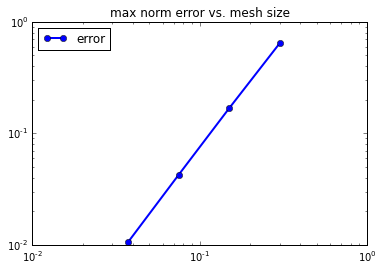

In [15]:
plt.title('max norm error vs. mesh size')
L1,=plt.loglog(dh,Er,label='error',lw=2,marker='o')
Leg1=plt.legend(handles=[L1],loc=2)
plt.show()

In [16]:
slope, intercept = np.polyfit(np.log(dh[:,0]),np.log(Er[:,0]),1)
print ('order of convergence: ',slope)

order of convergence:  1.96805975369


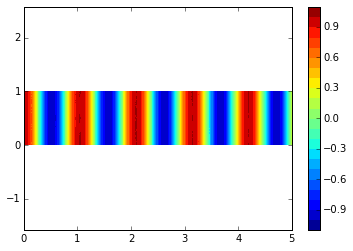

In [17]:
tplot(p,t,u)